In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns




In [9]:
data = pd.read_csv("WineDataset.csv")
data

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


In [10]:
stats = data.describe()
stats

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
data.info()

In [60]:
if not data.isna().any().any():
    print("data is ok")
else:
    print("The number of missing values in each column:")
    data.isna().sum()
    data.dropna(how='any', inplace=True)

data is ok


In [61]:
def label_encode(data):
    for column in data.columns:
        if data[column].dtype == 'object':  
            unique_vals = data[column].unique()  
            val_map = {val: idx for idx, val in enumerate(unique_vals)}  
            data[column] = data[column].map(val_map)  
    return data

data_encoded = label_encode(data.copy())

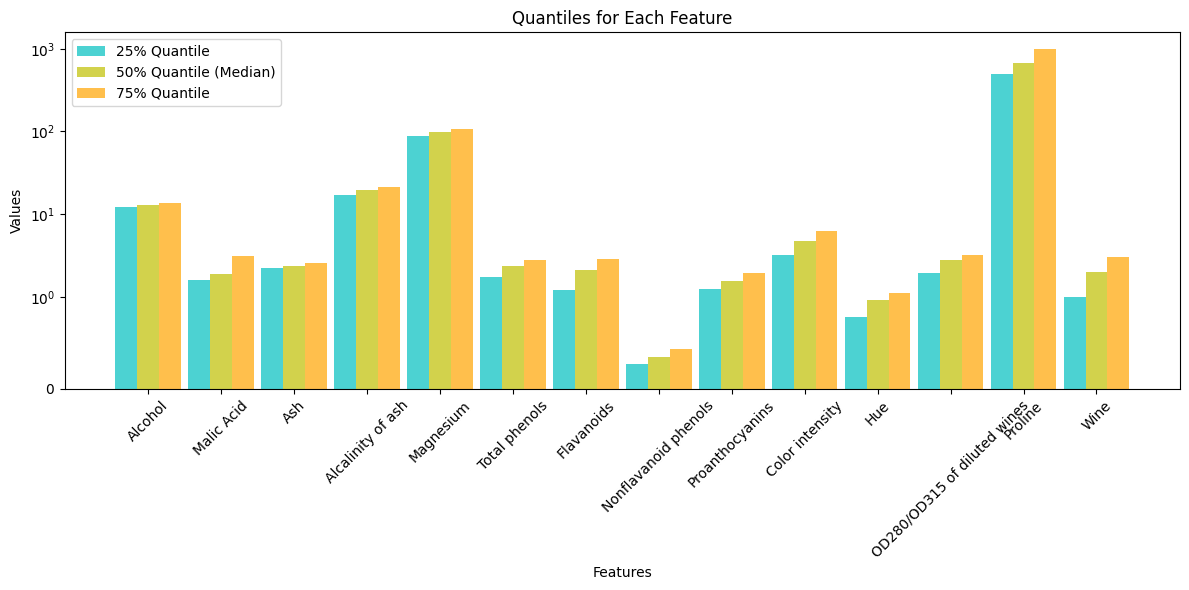

In [11]:
# Квантили 25%, 50% (медиана), 75%
q25_values = stats.loc['25%']
q50_values = stats.loc['50%']
q75_values = stats.loc['75%']

index = np.arange(len(q25_values))  # Делаем индекс на основе количества квантилей

bar_width = 0.3  # Ширина бара

# Визуализация квартилей
plt.figure(figsize=(12, 6))
plt.bar(index, q25_values, bar_width, label='25% Quantile', alpha=0.7, color='c')
plt.bar(index + bar_width, q50_values, bar_width, label='50% Quantile (Median)', alpha=0.7, color='y')
plt.bar(index + 2 * bar_width, q75_values, bar_width, label='75% Quantile', alpha=0.7, color='orange')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Quantiles for Each Feature')
plt.xticks(index + bar_width, q25_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
quantiles = data.quantile([0.25, 0.50, 0.75])
print("Квантили для каждого столбца (25%, 50%, 75%):")
print(quantiles)

Квантили для каждого столбца (25%, 50%, 75%):
      Alcohol  Malic Acid     Ash  Alcalinity of ash  Magnesium  \
0.25  12.3625      1.6025  2.2100               17.2       88.0   
0.50  13.0500      1.8650  2.3600               19.5       98.0   
0.75  13.6775      3.0825  2.5575               21.5      107.0   

      Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0.25         1.7425       1.205                0.2700            1.250   
0.50         2.3550       2.135                0.3400            1.555   
0.75         2.8000       2.875                0.4375            1.950   

      Color intensity     Hue  OD280/OD315 of diluted wines  Proline  Wine  
0.25             3.22  0.7825                        1.9375    500.5   1.0  
0.50             4.69  0.9650                        2.7800    673.5   2.0  
0.75             6.20  1.1200                        3.1700    985.0   3.0  


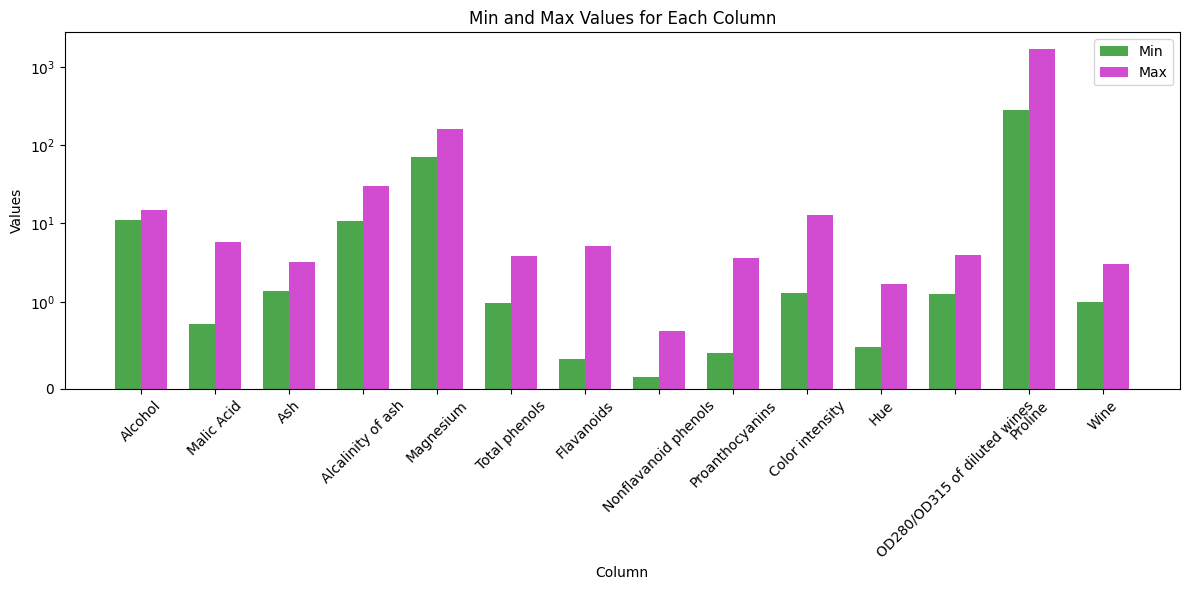

In [30]:
# Минимум и максимум
min_values = stats.loc['min']
max_values = stats.loc['max']

# Визуализация минимума и максимума
plt.figure(figsize=(12, 6))
plt.bar(index, min_values, bar_width, label='Min', alpha=0.7, color='g')
plt.bar(index + bar_width, max_values, bar_width, label='Max', alpha=0.7, color='m')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values')
plt.title('Min and Max Values for Each Column')
plt.xticks(index + bar_width / 2, min_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Minimum values for each column:")
print(min_values)


In [ ]:
print("\nMaximum values for each column:")
print(max_values)

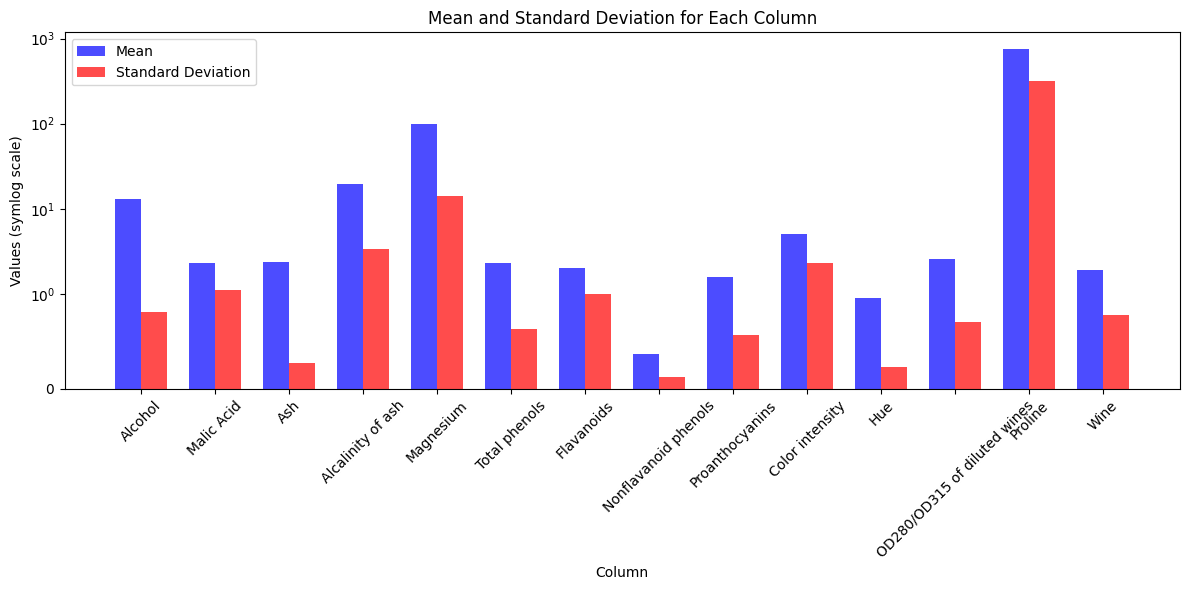

In [31]:
# Среднее значение и стандартное отклонение
mean_values = stats.loc['mean']
std_values = stats.loc['std']

# Визуализация среднего значения и стандартного отклонения с симметричной логарифмической шкалой
plt.figure(figsize=(12, 6))
index = np.arange(len(mean_values))
bar_width = 0.35

plt.bar(index, mean_values, bar_width, label='Mean', alpha=0.7, color='b')
plt.bar(index + bar_width, std_values, bar_width, label='Standard Deviation', alpha=0.7, color='r')

# Симметричная логарифмическая шкала для оси Y
plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values (symlog scale)')
plt.title('Mean and Standard Deviation for Each Column')
plt.xticks(index + bar_width / 2, mean_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


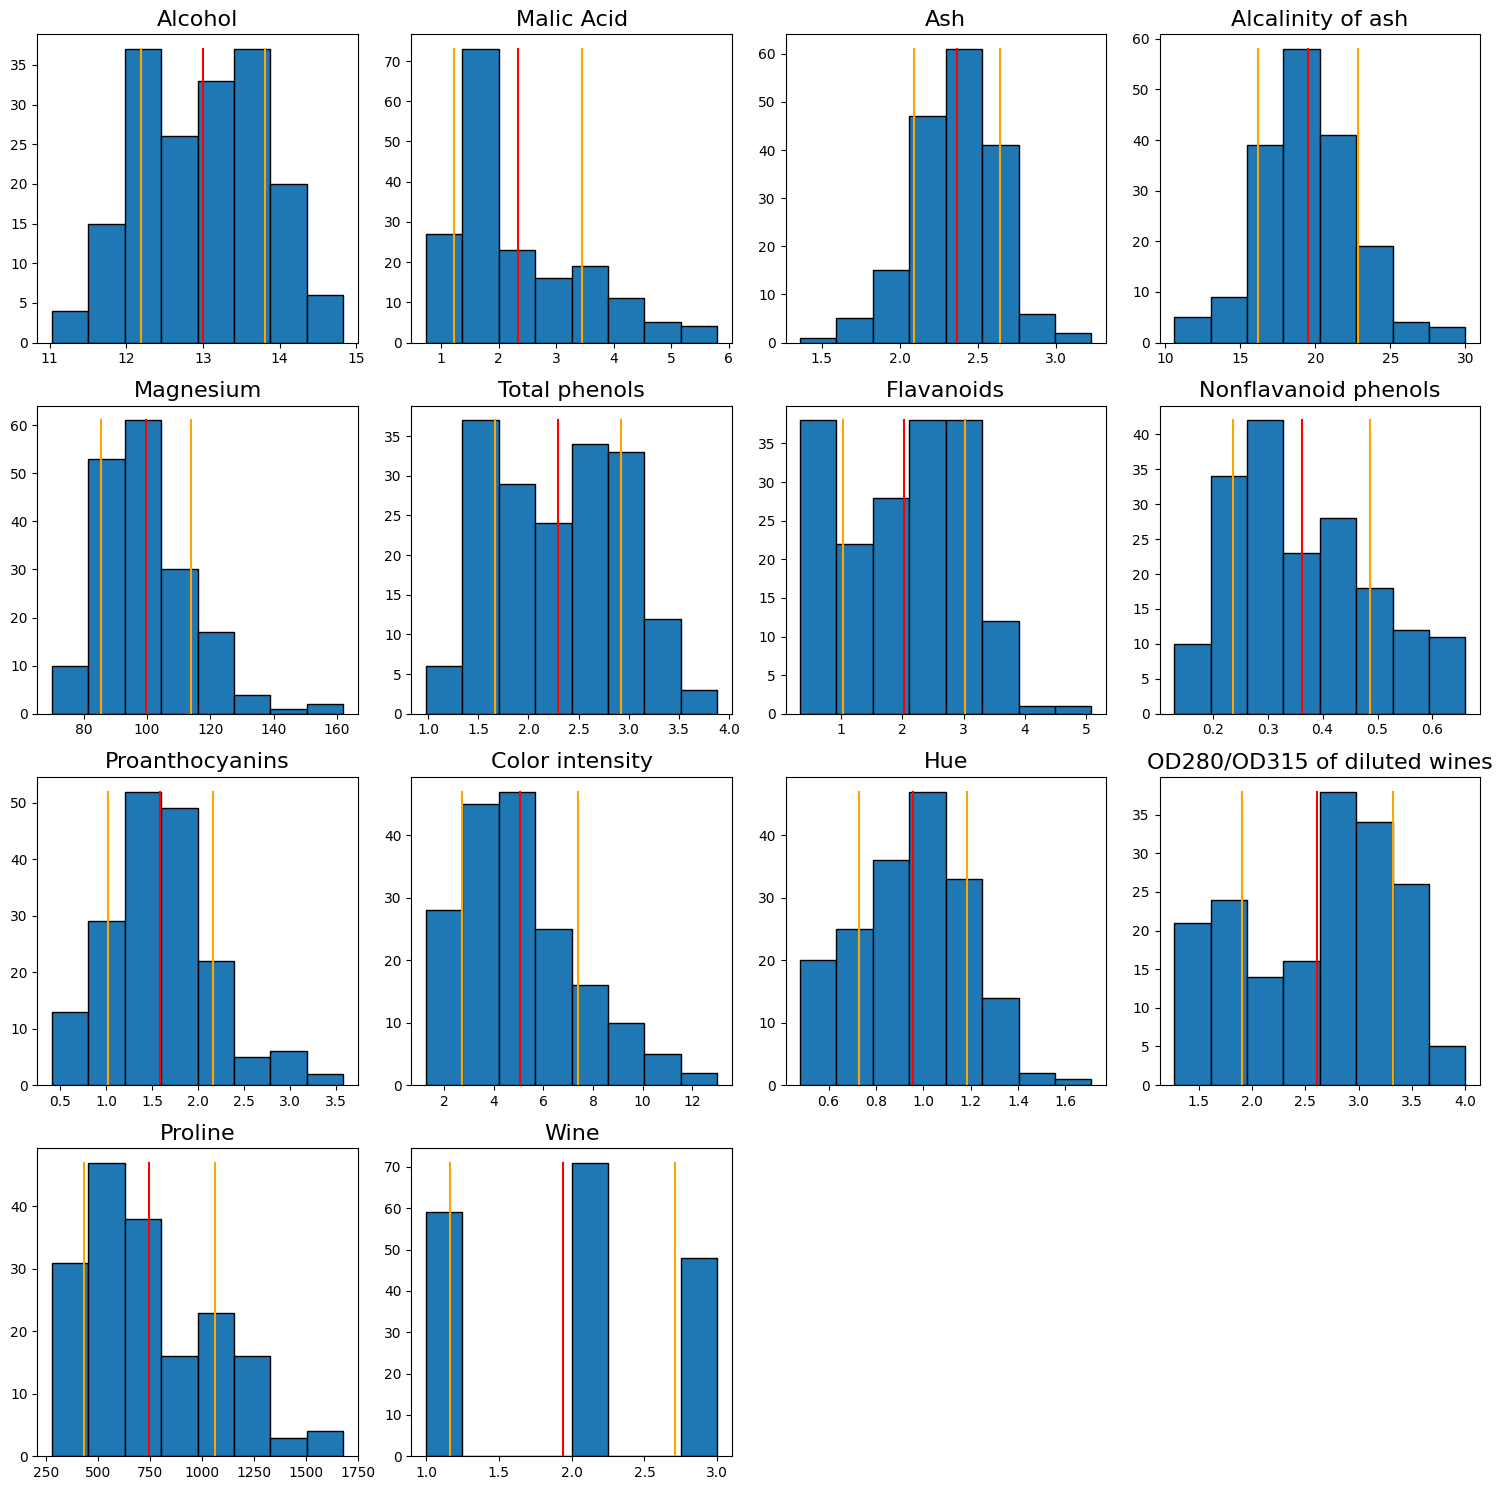

In [48]:
rows_count = data.shape[0] 
cols_count = data.shape[1]

means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2)) / (rows_count - 1)
std_offsets = np.sqrt(corrected_dispersions)


bins_count = 1 + int(math.log(rows_count, 2)) #стeрджес

titles = data.columns
fig = plt.figure(figsize=(15, 15))

for i, column in enumerate(titles):
  ax = fig.add_subplot(4, 4, i + 1)
  hist = ax.hist(data[column], bins = bins_count, edgecolor = "black")
  ax.plot([means.iloc[i], means.iloc[i]], [0, np.max(hist[0])], color = "red")
  ax.plot([means.iloc[i] - std_offsets.iloc[i], means.iloc[i] - std_offsets.iloc[i]], [0, np.max(hist[0])], color = "orange")
  ax.plot([means.iloc[i] + std_offsets.iloc[i], means.iloc[i] + std_offsets.iloc[i]], [0, np.max(hist[0])], color = "orange")

  ax.set_title(titles[i], fontsize=16)

fig.tight_layout()
plt.show()

In [ ]:
print("Average values for each column:")
print(mean_values)
print("\nThe standard deviation for each column:")
print(std_values)

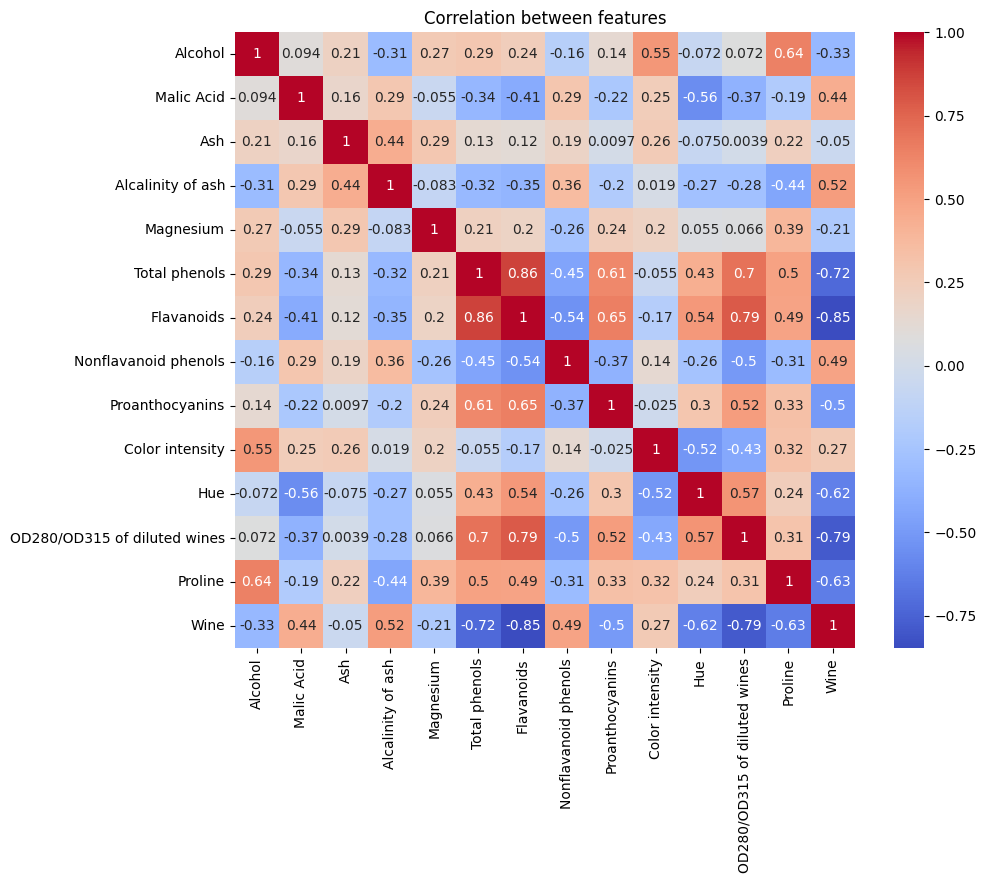

In [54]:

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

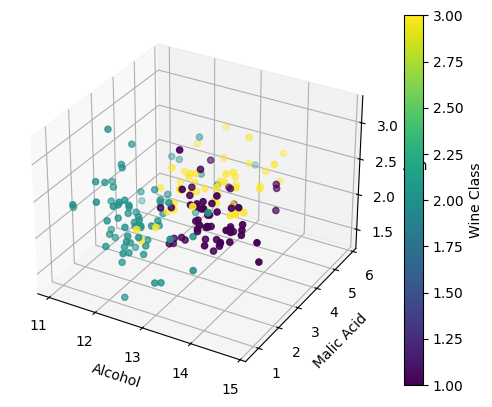

In [78]:
def plot_3d_features(x, y, z, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Визуализация точек с цветовой картой в зависимости от меток классов
    scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')

    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic Acid')
    ax.set_zlabel('Ash')

    legend = plt.colorbar(scatter)
    legend.set_label('Wine Class')

    plt.show()

x = data['Alcohol']     
y = data['Malic Acid']  
z = data['Ash']         
labels = data['Wine']
plot_3d_features(x, y, z, labels)